<a href="https://colab.research.google.com/github/duyquoc1508/Facial_expression_recognition_with_keras/blob/master/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"duyquoc","key":"e0fa6f0738a82880ab1dbb24bd8663ba"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d nicolejyt/facialexpressionrecognition -p /content

facialexpressionrecognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip \*.zip

Archive:  facialexpressionrecognition.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fer2013.csv             


In [0]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = pd.read_csv('fer2013.csv')
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


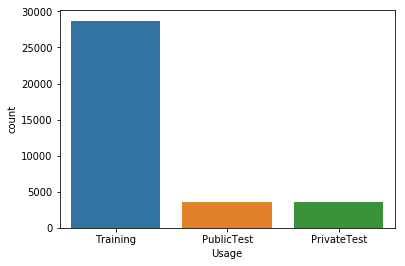

In [0]:
sns.countplot(dataset['Usage'],label="Count")

Không dùng các dòng PrivateTest

In [0]:
dataset = dataset[(dataset.Usage != "PrivateTest")]

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32298 entries, 0 to 32297
Data columns (total 3 columns):
emotion    32298 non-null int64
pixels     32298 non-null object
Usage      32298 non-null object
dtypes: int64(1), object(2)
memory usage: 1009.3+ KB


Đếm số lượng dữ liệu trong dataset, chia theo test và train

In [0]:
print(dataset.groupby('Usage')['emotion'].count())

Usage
PublicTest     3589
Training      28709
Name: emotion, dtype: int64


Mô tả dưới dạng sơ đồ

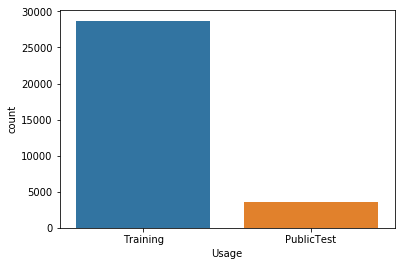

In [0]:
sns.countplot(dataset['Usage'],label="Count")

In [0]:
data_train = dataset[(dataset.Usage == "Training")]
data_test = dataset[(dataset.Usage == "PublicTest")]

In [0]:
data_train.groupby('emotion').size()

emotion
0    3995
1     436
2    4097
3    7215
4    4830
5    3171
6    4965
dtype: int64

Mô tả dưới dạng bản đồ

Xem lượng dữ liệu của từng lớp trong tập train

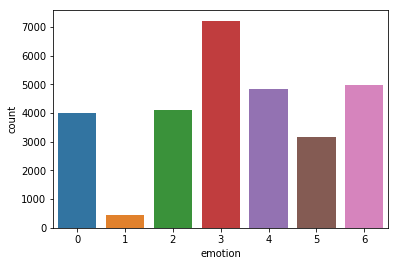

In [0]:
sns.countplot(data_train['emotion'])

Xem lượng dữ liệu của từng lớp trong tập test

In [0]:
data_test.groupby('emotion').size()

emotion
0    467
1     56
2    496
3    895
4    653
5    415
6    607
dtype: int64

Mô tả dạng bản đồ

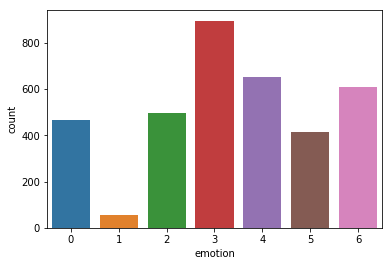

In [0]:
sns.countplot(data_test['emotion'])

Lấy 1 dòng của thuộc tính pixel kiểm tra xem kiểu dữ liệu và cấu trúc

In [0]:
img = dataset["pixels"][0] # first image
img

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

Ta thấy kiểu dữ liệu ở đây là một chuổi các phần tử các nhau bởi dấu ','.

In [0]:
#ép kiểu thành mảng các số float
val = img.split(" ")
x_pixels = np.array(val, 'float32')
print(x_pixels)

[ 70.  80.  82. ... 106. 109.  82.]


Tiến hành căn bậc 2 của số lượng phần từ thì ta nhận thấy các giá trị của mảng này là ma trận vuông 2 chiều 48 x 48

In [0]:
print(math.sqrt(len(x_pixels)))

48.0


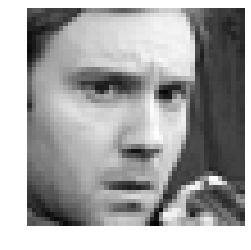

In [0]:
x_reshaped = x_pixels.reshape(48,48)
plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")    
plt.axis("off")
plt.show()

In [0]:
with open("fer2013.csv") as f:
  content = f.readlines()
 
lines = np.array(content)

In [0]:
dataset.shape[0]

32298

In [0]:
x_train, y_train, x_test, y_test = [], [], [], []

In [0]:
import keras

Using TensorFlow backend.


In [0]:
for i in range(1,dataset.shape[0]):
    try:
      # đọc từng dòng dữ liệu và tách ra giá trị các cột
      emotion, img, usage = lines[i].split(",")

      val = img.split(" ")

      #ep kieu của ảnh thành mảng các số float 
      pixels = np.array(val, 'float32')
      
      # chuyển sang dạng one-hot
      emotion = keras.utils.to_categorical(emotion, 7)
      if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
      elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)
    except:
      print("",end="")

In [0]:
print(len(x_train), len(x_test))

28709 3588


In [0]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255.0 #normalize inputs between [0, 1]
x_test /= 255.0

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
# x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
# x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3588 test samples


In [0]:
import keras
import cv2
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [0]:
num_features = 64
num_classes = 7   #['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
batch_size = 256
epochs = 50
width, height = 48, 48

Xây dựng model

In [0]:
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [0]:
# show model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

Compile model

In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

In [0]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

Training

In [0]:
model.fit(np.array(x_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(x_test), np.array(y_test)),
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 28709 samples, validate on 3588 samples
Epoch 1/50
28709/28709 [==============================] - 27s 944us/step - loss: 2.0581 - acc: 0.1992 - val_loss: 1.8163 - val_acc: 0.2494
Epoch 2/50
28709/28709 [==============================] - 20s 702us/step - loss: 1.8476 - acc: 0.2249 - val_loss: 1.8071 - val_acc: 0.2494
Epoch 3/50
28709/28709 [==============================] - 21s 717us/step - loss: 1.8218 - acc: 0.2393 - val_loss: 1.8038 - val_acc: 0.2494
Epoch 4/50
28709/28709 [==============================] - 21s 728us/step - loss: 1.8088 - acc: 0.2458 - val_loss: 1.8047 - val_acc: 0.2494
Epoch 5/50
28709/28709 [==============================] - 21s 720us/step - loss: 1.7746 - acc: 0.2663 - val_loss: 1.7068 - val_acc: 0.2943
Epoch 6/50
28709/28709 [==============================] - 21s 716us/step - loss: 1.7015 - acc: 0.3122 - val_loss: 1.7218 - val_acc: 0.3124
Epoch 7/50
28709/28709 [==============================] - 21s 716us/s

In [0]:
pip install h5py

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D


Lưu model

In [0]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred[0]

array([0.223694  , 0.01739363, 0.2083128 , 0.02878012, 0.3154622 ,
       0.02130933, 0.1850479 ], dtype=float32)

In [0]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
#lấy index của giá trị lớn nhất
y_pred2 = [ np.argmax(item) for item in y_pred ]
y_test2 = [ np.argmax(item) for item in y_test]

# Lưu giá trị True nếu dự đoán là đúng và False nếu dự đoán sai
accuracy = [ (x==y) for x,y in zip(y_pred2,y_test2) ]
print(" Accuracy on Test set : " , np.mean(accuracy))

 Accuracy on Test set :  0.6360089186176142


In [0]:
y_pred2[0]

4

In [0]:
y_test2[0]

0

In [0]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.3964254014203614
Train accuracy: 85.878992650596
Test loss: 1.1755894793980364
Test accuracy: 63.60089186176142


In [0]:
#mới
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.3964254014203614
Train accuracy: 85.878992650596
Test loss: 1.1755894793980364
Test accuracy: 63.60089186176142


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


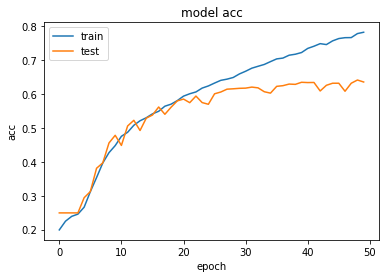

In [0]:
print(model.history.history.keys())
import matplotlib.pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


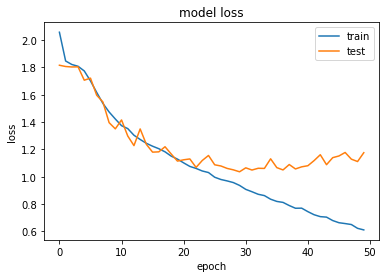

In [0]:
#mới
print(model.history.history.keys())
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


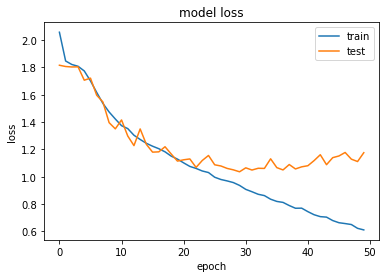

In [0]:
#cũ
print(model.history.history.keys())
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import itertools

Ma trận nhầm lẫn

In [0]:
print('Confusion Matrix')
confusion_mtx = confusion_matrix(y_test2, y_pred2)
print(confusion_mtx)

Confusion Matrix
[[241  20  28  25  72   9  72]
 [ 12  34   4   3   3   0   0]
 [ 42   8 193  16 141  25  71]
 [ 17   0  19 762  21  12  64]
 [ 51   5  51  41 364   8 132]
 [  9   1  42  23   6 320  14]
 [ 36   2  28  58 113   2 368]]


In [0]:
cm_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)

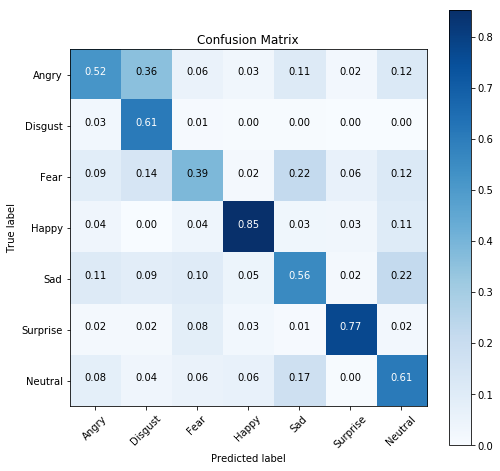

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
  plt.text(j, i,'{:.2f}'.format(cm_normalized[i, j]),
      horizontalalignment="center",
      color="white" if cm_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print('Classification Report')
print(classification_report(y_test2, y_pred2, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Angry       0.59      0.52      0.55       467
     Disgust       0.49      0.61      0.54        56
        Fear       0.53      0.39      0.45       496
       Happy       0.82      0.85      0.84       895
         Sad       0.51      0.56      0.53       652
    Surprise       0.85      0.77      0.81       415
     Neutral       0.51      0.61      0.55       607

   micro avg       0.64      0.64      0.64      3588
   macro avg       0.61      0.61      0.61      3588
weighted avg       0.64      0.64      0.63      3588



In [0]:
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import os
import cv2

In [0]:
#load model
json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
WIDTH = 48
HEIGHT = 48
x=None
y=None
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [0]:
#loading image
image = cv2.imread("test2.jpg")
print("Image Loaded")
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#mảng các khuôn mặt nhận diện được
faces = face_cascade.detectMultiScale(gray, 1.3  , 10)

Image Loaded


In [0]:
from google.colab.patches import cv2_imshow

Emotion: Happy
Angry: 0.0000368926 %
Disgust: 0.0000000000 %
Fear: 0.0061548790 %
Happy: 99.9542465210 %
Sad: 0.0016262088 %
Surprise: 0.0099221040 %
Neutral: 0.0280139353 %


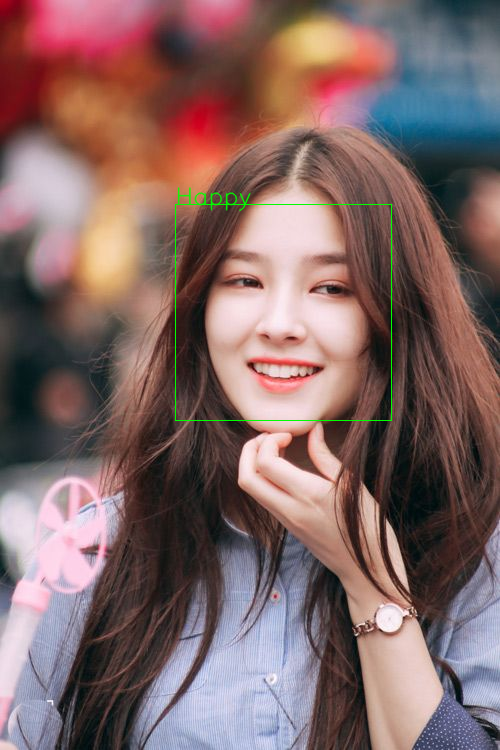

-1

In [0]:
for (x, y, w, h) in faces:
        face = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(face, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        #predicting the emotion
        yhat= loaded_model.predict(cropped_img)
        emotion_index = np.argmax(yhat)
        cv2.putText(image, labels[emotion_index], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
        print("Emotion: "+labels[emotion_index])
        yhat_percent = yhat * 100
        print("Angry: {:.10f} %\nDisgust: {:.10f} %\nFear: {:.10f} %\nHappy: {:.10f} %\nSad: {:.10f} %\nSurprise: {:.10f} %\nNeutral: {:.10f} %".format(
        yhat_percent[0,0], yhat_percent[0,1], yhat_percent[0,2], yhat_percent[0,3], yhat_percent[0,4], yhat_percent[0,5], yhat_percent[0,6]))
        print("===================================")
cv2_imshow(image)
cv2.waitKey()


In [0]:
plt.figure(figsize=(6,6))
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, yhat[0], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('percentage')
plt.title('emotion')
 
plt.show()